### <center>A machine learning approach to classify cancer genes and  cancer-associated immune genes in a Next-generation RNA Seq</center>

#### Authors
* Lawrence Thanakumar Rajappa (**IDA, Linköping University, Linköping**)
* krzysztof Bartoszek (**STIMA,Linköping University, Linköping**)
* Jenny Persson (**Molecular Biology, Umeå University, Umeå**)

#### Abstract
<p align="justify">
In this study, we aim to predict the invasiveness of cancer subtypes by using a supervised and unsupervised machine learning approach. We will base on the next-generation RNA sequence data of cancer cells and cancer-associated immune cells to classify the cancerous cells from immune cells in the given samples taken from cancer patients and compare the classification/prediction performance of machine learning models such as SVM, decision tree, random forest, hierarchical clustering, etc. and choose the model that performs better. 

The evolution of genomic sequencing technology has led researchers to perform various experiments to find a cure for various genetic diseases such as cancer. The advent of Artificial Intelligence, especially in the healthcare sector has paved the way to numerous solutions such as drug discovery, cost-effective treatment for patients, etc. which would be beneficial for pharmaceutical organizations, hospitals, and researchers to perform their experiments at a fast pace. Further, Next-generation RNA sequencing data has helped to find the relationship between gene expression profiles and different developmental stages of a cell or a disease in an efficient and cost-effective approach with higher accuracy. There are various methodologies mentioned in various literature related to a cure for cancer, still, the fatality rate of cancer cannot be reduced. The machine learning approach helps us to understand the complexities and processes of cancer samples that lead to the development of effective cancer treatment/drugs in a reliable, fast, and efficient way.</p>


### Loading required libraries

In [1]:
%matplotlib inline
# Data loading and manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import graphviz 

# ML algorithms libraries
from sklearn import tree # Decision tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import svm # SVM

### Loading the data

In [2]:
gene_data = pd.read_csv("12_Sample_Gene_List_Updated_with_labels.csv", index_col=False)

In [3]:
gene_data = gene_data.drop(["Unnamed: 0"], axis=1)

In [4]:
gene_data.sample(frac=1).head(6)

,Genes,hgnc_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DR_UR,Type
412,ENSG00000123607,TTC21B,50.099684,8.130035,0.894683,9.087061,0.000000e+00,0.000000e+00,UR,Cancer
239,ENSG00000183822,NCF4-AS1,2.006817,3.822511,1.180006,3.239399,1.197817e-03,3.092131e-03,UR,Immune
87,ENSG00000175535,PNLIP,1.459279,3.108873,1.351981,2.299494,2.147688e-02,4.233882e-02,UR,Immune
399,ENSG00000107105,ELAVL2,182.848942,10.504594,0.862548,12.178557,0.000000e+00,0.000000e+00,UR,Cancer
283,ENSG00000162076,FLYWCH2,9.763261,5.773251,0.943019,6.122097,9.235186e-10,4.969137e-09,UR,Cancer
508,ENSG00000274346,NaN,60.648625,8.869616,0.970471,9.139494,0.000000e+00,0.000000e+00,UR,Cancer


### Descriptive statistics

In [27]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = gene_data.describe()
print(description)

       baseMean  log2FoldChange    lfcSE     stat     pvalue       padj
count   565.000         565.000  565.000  565.000  5.650e+02  5.650e+02
mean     29.105           0.524    1.038    0.611  2.153e-03  4.519e-03
std      53.766           6.268    0.176    6.749  5.302e-03  1.065e-02
min       1.127         -10.760    0.200  -12.804  0.000e+00  0.000e+00
25%       2.670          -4.920    0.894   -4.792  0.000e+00  3.000e-16
50%       7.242           3.186    0.980    2.385  1.308e-08  6.341e-08
75%      27.999           6.104    1.176    6.508  5.975e-04  1.619e-03
max     422.419          10.818    1.549   13.437  2.563e-02  4.949e-02


Along the diagonal, we could see the histogram representing the data distribution across all the features. Except, ***log2FoldChange*** and ***stat*** all other features have positively skewed data distribution. 

#### Checking for class label distribution

##### Checking whether class labels are imbalanced or not

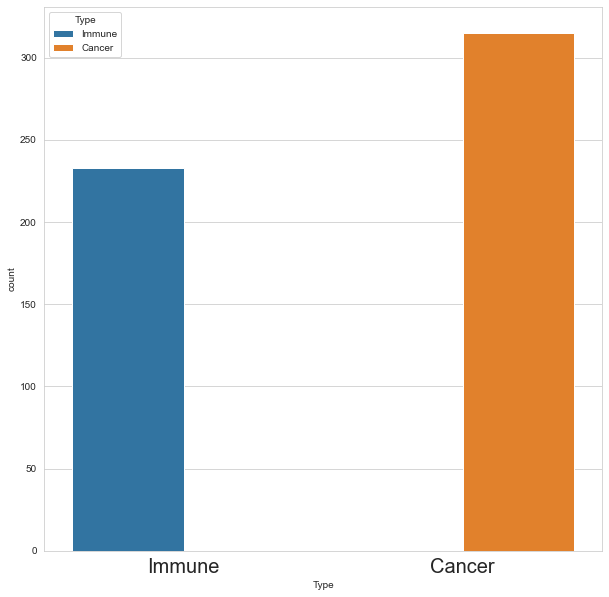

In [25]:
plt.figure(figsize=(10,10))
plt.rcParams["xtick.labelsize"] = 20
imbalance = sns.countplot(x='Type',hue="Type",data=gene_data_wo_outliers)

From the above plot, it is not completely imbalanced i.e. only **80** data points are missing in ***Immune*** class label when compared with ***Cancer*** class label. Hence, we could do resampling, generate synthetic data using libraries such as SMOTE.

#### Correlation between features

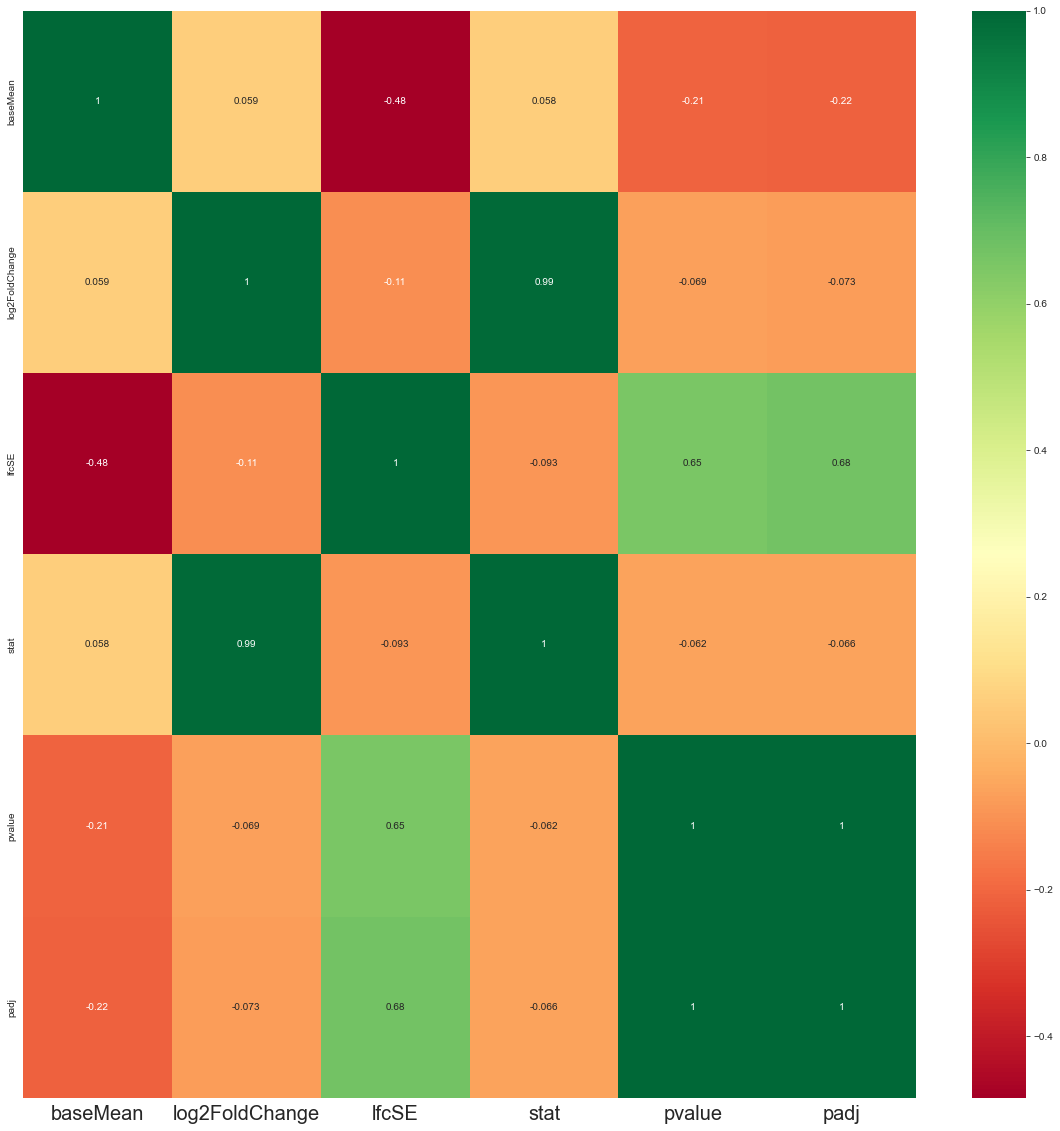

In [28]:
correlation_Matrix = gene_data.corr()
features = correlation_Matrix.index
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(gene_data[features].corr(),annot=True,cmap="RdYlGn")

In [29]:
print(correlation_Matrix)

                baseMean  log2FoldChange  lfcSE   stat  pvalue   padj
baseMean           1.000           0.059 -0.484  0.058  -0.208 -0.217
log2FoldChange     0.059           1.000 -0.109  0.992  -0.069 -0.073
lfcSE             -0.484          -0.109  1.000 -0.093   0.654  0.675
stat               0.058           0.992 -0.093  1.000  -0.062 -0.066
pvalue            -0.208          -0.069  0.654 -0.062   1.000  0.999
padj              -0.217          -0.073  0.675 -0.066   0.999  1.000


From the above heatmap and correlation matrix, it can be seen that ***log2FoldChange***, ***stat***, ***pvalue***, and ***padj*** are highly positive correlated which might decrease the performance of classification algorithms.

#### Checking the data distribution against each feature

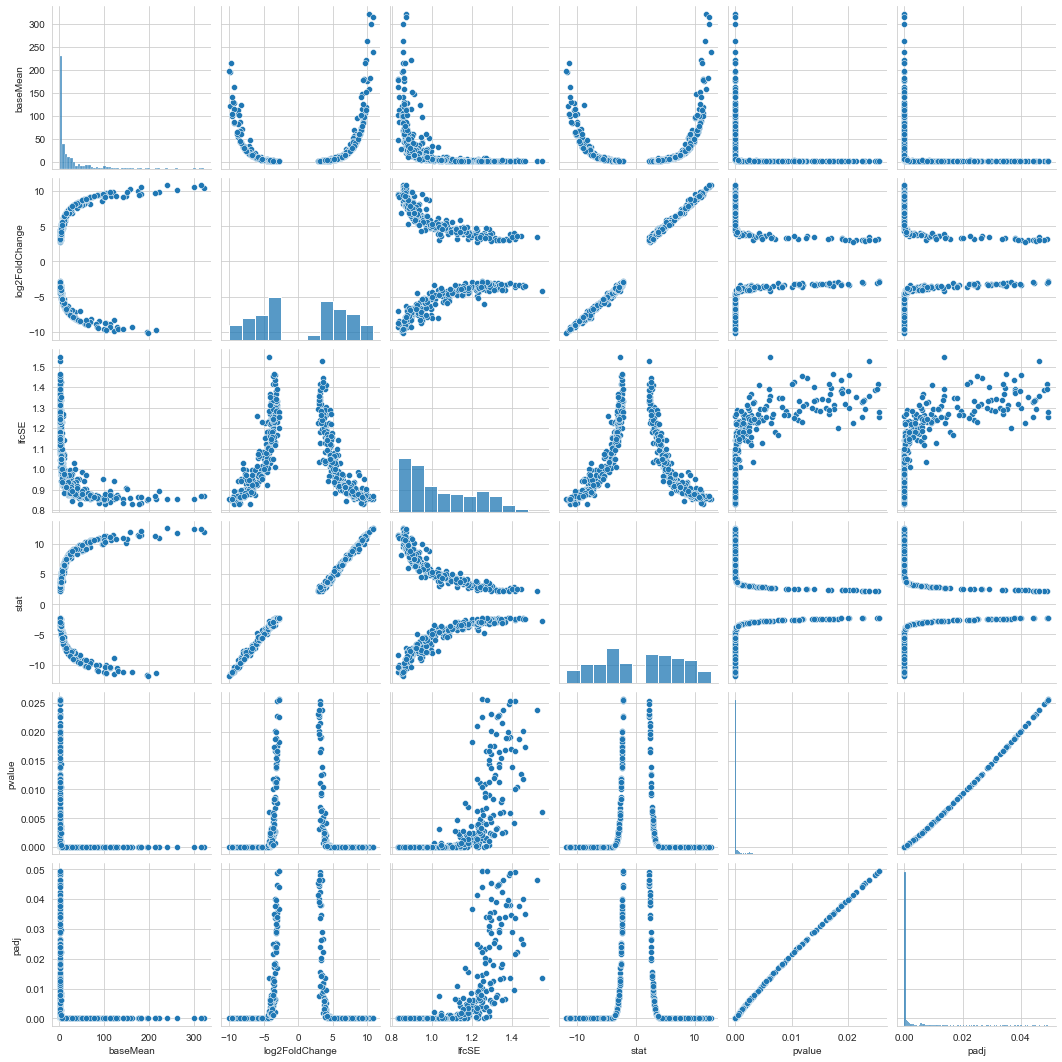

In [24]:
sns.pairplot(gene_data_wo_outliers)

In [30]:
skew = gene_data.skew()
print(skew)

baseMean          3.563
log2FoldChange   -0.090
lfcSE             0.389
stat             -0.085
pvalue            2.852
padj              2.701
dtype: float64


C:\Users\JPESTU~1\AppData\Local\Temp/ipykernel_4240/3367675989.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew = gene_data.skew()


From the above skew table, ***baseMean***, ***pvalue***, and ***padj*** are highly positively skewed and requires data transformation to reduce skewness.

### Preprocessing of data

##### Checking for missing data

In [5]:
gene_data.isna().sum()

Genes               0
hgnc_symbol       124
baseMean            0
log2FoldChange      0
lfcSE               0
stat                0
pvalue              0
padj                0
DR_UR               0
Type                0
dtype: int64

**There is no reason to fill the missing gene symbols, as some genes will be a novel genes and do not have gene names. Moreover, this dimension won't be an important feature related to our target variable <mark>"Type"</mark>.**

#### Checking for linear separability (before outliers removal)

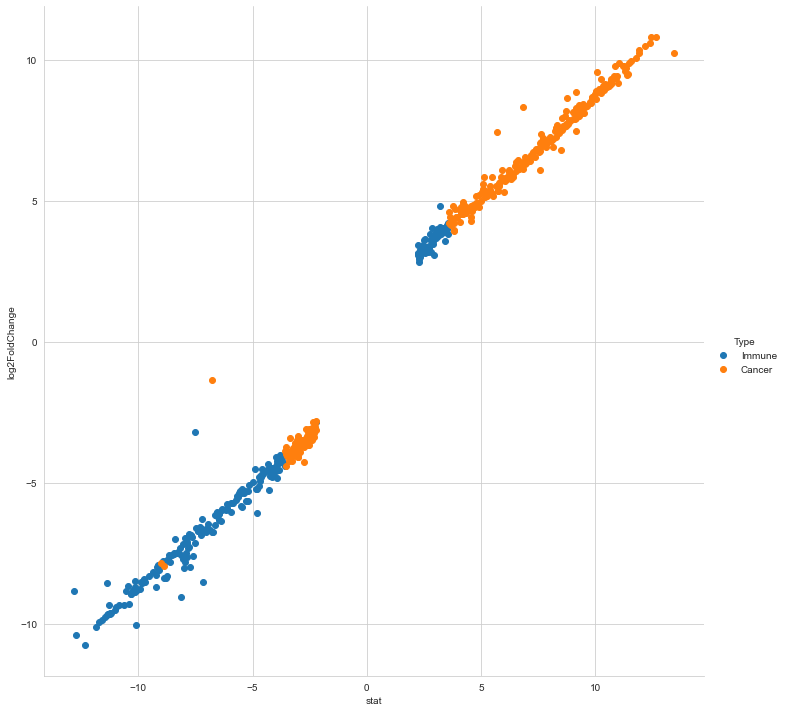

In [6]:
sns.set_style("whitegrid")
sns.FacetGrid(gene_data, hue="Type", height=10) \
   .map(plt.scatter, "stat", "log2FoldChange") \
   .add_legend()
plt.show()

From the above graph, it could be seen that there is no linear separability is available. Hence we need to apply non-linear classification algorithms such as SVM Kernel, k-nearest-neighbors (kNN), Random Forest, and etc.

#### Checking for linear separability (after outliers removal)

##### List of outlier genes

In [7]:
outlier_genes = ["ENSG00000107159","ENSG00000119138","ENSG00000125676","ENSG00000254717","ENSG00000123096",
                 "ENSG00000110169","ENSG00000255386","ENSG00000134516","ENSG00000283051","ENSG00000204382",
                 "ENSG00000261997","ENSG00000269516","ENSG00000173391","ENSG00000172243","ENSG00000277120",
                 "ENSG00000169093"]

In [9]:
gene_data_wo_outliers = gene_data[~gene_data.Genes.isin(outlier_genes)]

**I have removed the above 16 outliers genes from the original data as I have more data and removing these gene data won't affect the downstream analysis.**

In [13]:
gene_data_wo_outliers.sample(frac=1).head(6)

,Genes,hgnc_symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,DR_UR,Type
94,ENSG00000225825,IGHD6-25,1.147515,3.012266,1.296739,2.322955,0.020182,0.040149,UR,Immune
64,ENSG00000265354,TIMM23,7.161659,-5.199399,1.084916,-4.792444,0.000002,0.000006,DR,Immune
351,ENSG00000159658,EFCAB14,2.205964,-3.626665,1.230938,-2.946263,0.003216,0.007674,DR,Cancer
108,ENSG00000182310,SPACA6,2.065646,3.902438,1.155718,3.376637,0.000734,0.001968,UR,Immune
53,ENSG00000231107,LINC01508,67.371049,-8.521987,0.863242,-9.872073,0.000000,0.000000,DR,Immune
387,ENSG00000267198,NaN,1.481818,-3.393718,1.416493,-2.395859,0.016581,0.033781,DR,Immune


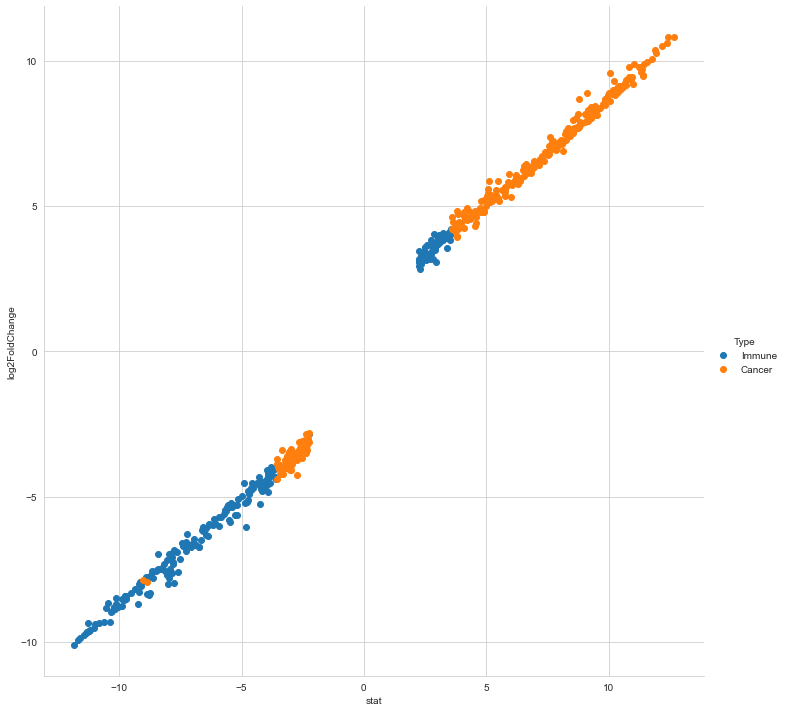

In [23]:
sns.set_style("whitegrid")
sns.FacetGrid(gene_data_wo_outliers, hue="Type", height=10) \
   .map(plt.scatter, "stat", "log2FoldChange") \
   .add_legend()
plt.show()